<a href="https://colab.research.google.com/github/ridwanulhoquejr/MNIST_Fashion_ANN-MLP-/blob/main/MNIST_Fashion_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Problem statement : Multilayer Perceptron Implementation for Image Classification

### Data Description : 

> It is a dataset of 60,000 small rectangular 28x28 pixel grayscale pictures of items from ten different categories of apparel, including shoes, t-shirts, dresses, and more. The following table shows the mapping of all 0-9 numbers to class labels.



    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dress
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot


In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [23]:
mnist_fashion = tf.keras.datasets.fashion_mnist

(xtrain, ytrain), (xtest, ytest) = mnist_fashion.load_data()


In [24]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
ytrain.shape

(60000,)

In [33]:
k = len(set(ytrain))
print('Number of classes :',k)

Number of classes : 10


In [26]:
unique, counts = np.unique(ytrain, return_counts=True)
print("Occurrence of Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [27]:
unique, counts = np.unique(ytest, return_counts=True)
print("Occurrence of Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [28]:
ran_images = np.random.randint(0, 60000, size=25)
ran_images

array([37236, 40499, 36539, 17254, 44256, 45146, 21689, 47947, 39701,
       46197,  5520, 14521, 22930,  9321, 37329, 39832, 56799, 21086,
       41363,  8889, 25972, 34519, 49961, 57784, 10071])

In [29]:
images = xtrain[ran_images]

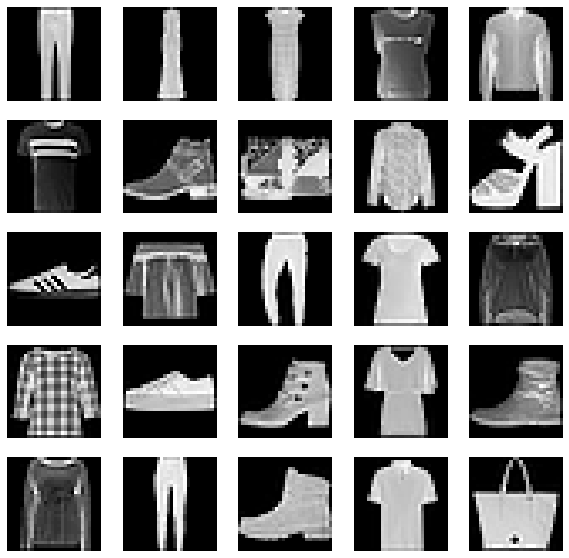

In [32]:
plt.figure(figsize=(10,10))
for i in range(len(ran_images)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()


In [31]:
ytest[:9]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)

In [34]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [35]:
xtrain[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

##Normalize data

 Now we have to normalize our `xtrain` and `xtest` data.

In [36]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [40]:
xtrain[:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [42]:
xtrain[1].shape

(28, 28)

## flatten the images into 28*28 = 784

Our image size is 28 by 28 matrix which is height and width of  an image and there is no RGB channel cause our images are in `GreyScale`.

So, now we have to Flatten our 28 * 28 matrix into 1 Dimentional feature vector.

In [43]:
xtrain = xtrain.reshape(len(xtrain), 28* 28)
xtest = xtest.reshape(len(xtest), 28*28)

In [44]:
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [58]:
model = tf.keras.Sequential()

#Hidden Layers
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

#Output Layer
model.add(Dense(k))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(xtrain, 
              ytrain, 
              validation_data=(xtest, ytest), 
              epochs=20, 
              batch_size=64)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.8049 - val_loss: 0.4339 - val_accuracy: 0.8417
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8551 - val_loss: 0.4116 - val_accuracy: 0.8505
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3588 - accuracy: 0.8697 - val_loss: 0.4277 - val_accuracy: 0.8435
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3381 - accuracy: 0.8743 - val_loss: 0.3745 - val_accuracy: 0.8628
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.8816 - val_loss: 0.3717 - val_accuracy: 0.8628
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8855 - val_loss: 0.3637 - val_accuracy: 0.8675
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.8898 - val_loss: 0.3736 - val_accuracy: 0.8655
Epoch 

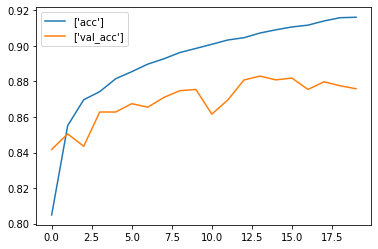

In [60]:
plt.plot(r.history['accuracy'], label=['acc'])
plt.plot(r.history['val_accuracy'], label=['val_acc']);
plt.legend();

**We can see that our model have overfitting issue as Accuracy of train data is greater than Accuracy of Test data.**

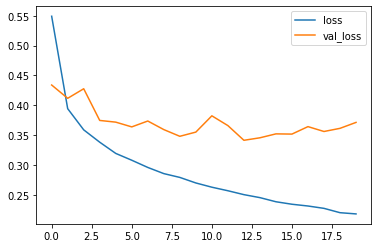

In [61]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [63]:
_, acc = model.evaluate(xtest,
               ytest,
               batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 0s 868us/step - loss: 0.3712 - accuracy: 0.8759

Test accuracy: 87.6%
